<a href="https://colab.research.google.com/github/arkaseth/Math-and-stat-for-ML/blob/main/DataNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Z-score

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
## create data

data = np.random.poisson(3, 1000) ** 2

In [ ]:
# compute mean and std dev
datamean = np.mean(data)
datastd = np.std(data, ddof=1)

In [ ]:
# data.mean()
# data.std(ddof=1)

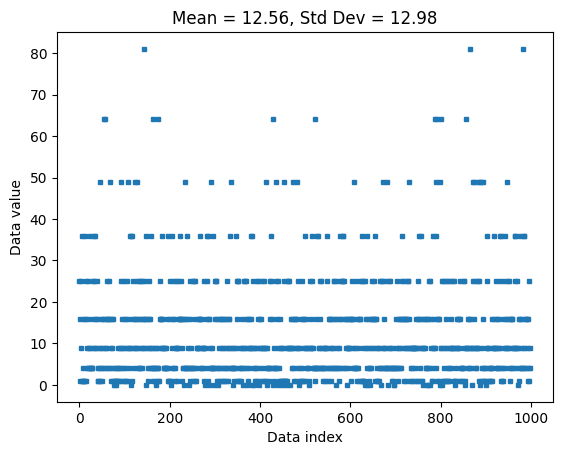

In [ ]:
plt.plot(data, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {datamean:.2f}, Std Dev = {datastd:.2f}")
plt.show()

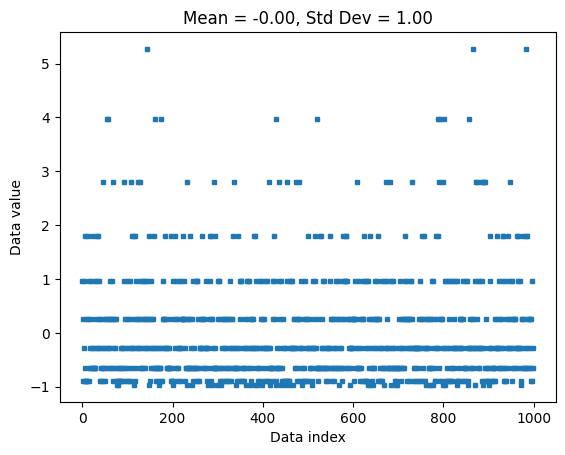

In [ ]:
# Z-transform the data

zscore = (data - datamean) / datastd

dataz = stats.zscore(data)

dataZmean = np.mean(dataz)
dataZstd = np.std(dataz, ddof=1)

plt.plot(dataz, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {dataZmean:.2f}, Std Dev = {dataZstd:.2f}")

plt.show()

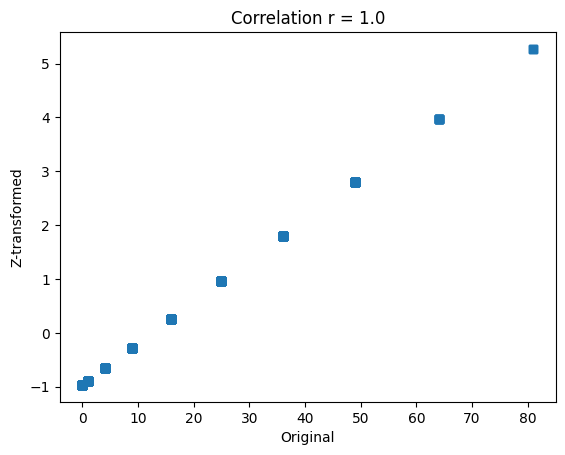

In [ ]:
## relative values are preserved -> shape does not change

plt.plot(data, dataz, 's')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title(f"Correlation r = {np.corrcoef(data,dataz)[0,0]}")
plt.show()

## Min-Max scaling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

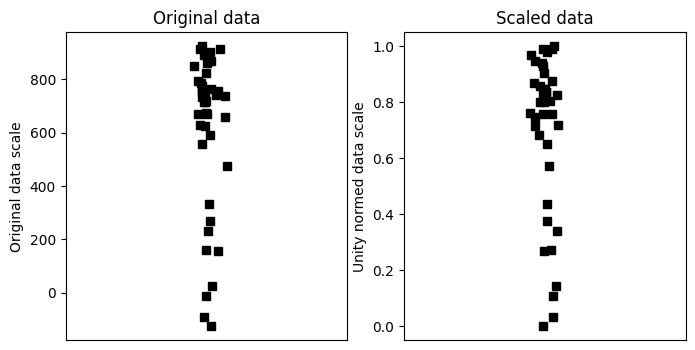

In [ ]:
N = 42
data = np.log(np.random.rand(N)) * 234 + 934

dataMin = np.min(data)
dataMax = np.max(data)

dataS = (data-dataMin)/(dataMax-dataMin)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks') # x-axis shift
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity normed data scale')
ax[1].set_title('Scaled data')

plt.show()

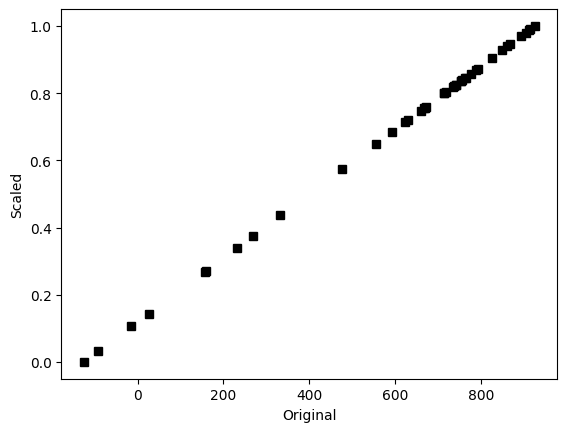

In [ ]:
# scaling does not affect relative values

plt.plot(data, dataS, 'ks')
plt.ylabel('Scaled')
plt.xlabel('Original')

plt.show()

In [ ]:
## scaling data to arbitrary range

# step 1: normalize to [0,1] as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS * (newMax-newMin) + newMin

print([min(dataSS), max(dataSS)])

[np.float64(4.0), np.float64(8.7)]


## Assignment: Invert min-max scaling

In [ ]:
recoveredData = dataMin + ((dataMax-dataMin)*(dataSS-newMin)/(newMax-newMin))

print(np.stack([recoveredData[:5], data[:5]]))

[[913.77800701 752.43478623 775.73538733 762.92658894 718.05358849]
 [913.77800701 752.43478623 775.73538733 762.92658894 718.05358849]]
